In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("./GlobalLandTemperaturesByCity.csv")

In [25]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [27]:
df[df["City"]=="Washington"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8161899,1743-11-01,5.339,1.828,Washington,United States,39.38N,76.99W
8161900,1743-12-01,NaN,NaN,Washington,United States,39.38N,76.99W
8161901,1744-01-01,NaN,NaN,Washington,United States,39.38N,76.99W
8161902,1744-02-01,NaN,NaN,Washington,United States,39.38N,76.99W
8161903,1744-03-01,NaN,NaN,Washington,United States,39.38N,76.99W
...,...,...,...,...,...,...,...
8165133,2013-05-01,17.134,0.188,Washington,United States,39.38N,76.99W
8165134,2013-06-01,22.919,0.245,Washington,United States,39.38N,76.99W
8165135,2013-07-01,25.658,0.304,Washington,United States,39.38N,76.99W
8165136,2013-08-01,22.722,0.241,Washington,United States,39.38N,76.99W


In [28]:
import matplotlib.pyplot as plt

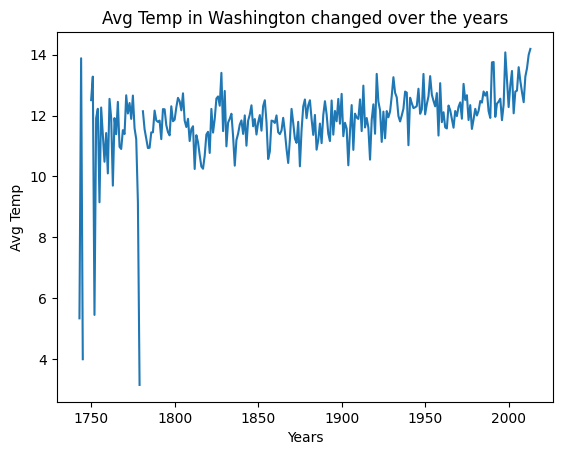

In [29]:
#line plot(How has the avg temp in a city changed over the years)
# X: Years, Y: Avg Temp

df["dt"] = pd.to_datetime(df["dt"],errors="coerce")

df["Year"] = df["dt"].dt.year

x = df[df["City"]=="Washington"]["Year"].unique()
y = df[df["City"]=="Washington"].groupby("Year")["AverageTemperature"].agg("mean")

plt.plot(x,y)
plt.title("Avg Temp in Washington changed over the years")
plt.xlabel("Years")
plt.ylabel("Avg Temp")

plt.show()

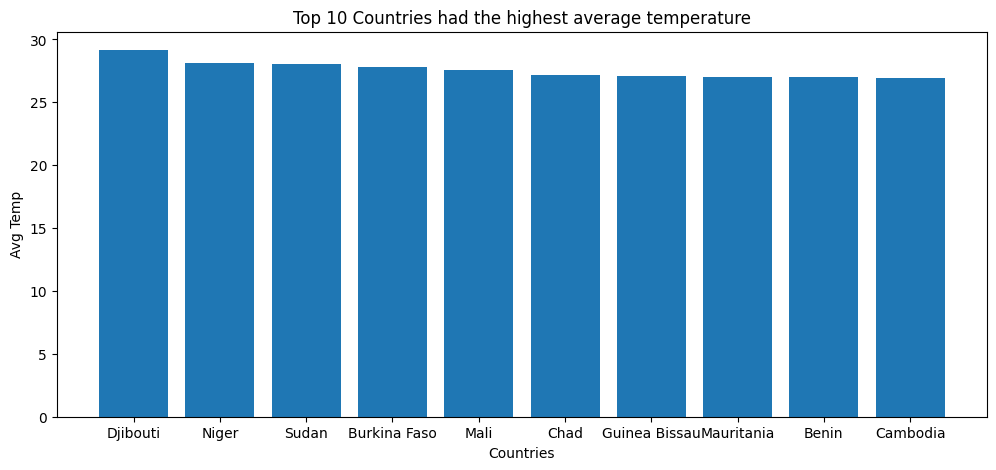

In [30]:
#Bar plot(Which countries had the highest average temperature in the dataset)
#X: Countries, Y: Avg Temp

avg_temps_of_countries = df.groupby("Country")["AverageTemperature"].mean().sort_values(ascending=False).head(10)

x=avg_temps_of_countries.index
y=avg_temps_of_countries.values

plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.title("Top 10 Countries had the highest average temperature")
plt.xlabel("Countries")
plt.ylabel("Avg Temp")
plt.show()

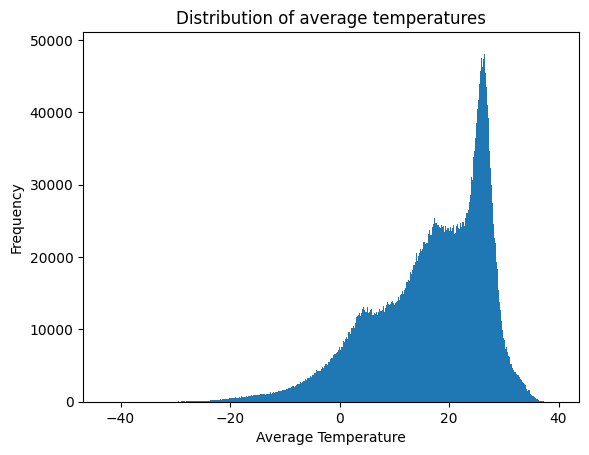

In [31]:
#Histogram(What is the distribution of average temperatures across all data)
#X: Temp Ranges, Y: Frequency

avg_temp = df["AverageTemperature"].dropna()

plt.hist(avg_temp,bins=1000)
plt.title("Distribution of average temperatures")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

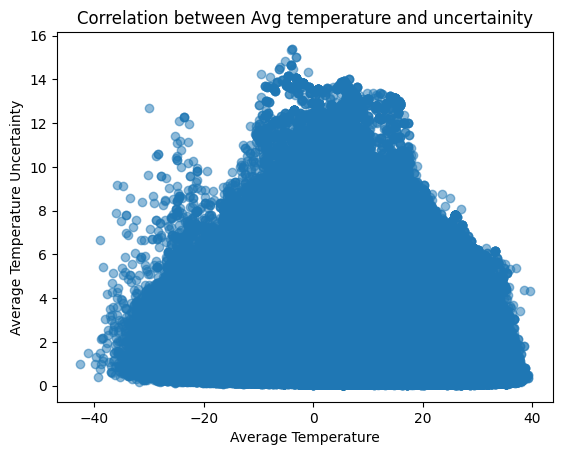

In [32]:
#Scatter plot(Is there a correlation between temperature and uncertainity in the dataset)
#X: Average Temp, Y: Temp Uncertainity

df_dropped_null = df.dropna(subset=["AverageTemperature","AverageTemperatureUncertainty"])
x = df_dropped_null["AverageTemperature"]
y = df_dropped_null["AverageTemperatureUncertainty"]

plt.scatter(x,y,alpha=0.5)
plt.title("Correlation between Avg temperature and uncertainity")
plt.xlabel("Average Temperature")
plt.ylabel("Average Temperature Uncertainty")
plt.show()

Year
1917    24.573571
1905    25.000663
1933    25.032755
1910    25.047677
1971    25.080024
          ...    
1941    26.175723
1958    26.198643
1988    26.208040
1998    26.219083
1987    26.342157
Name: AverageTemperature, Length: 99, dtype: float64


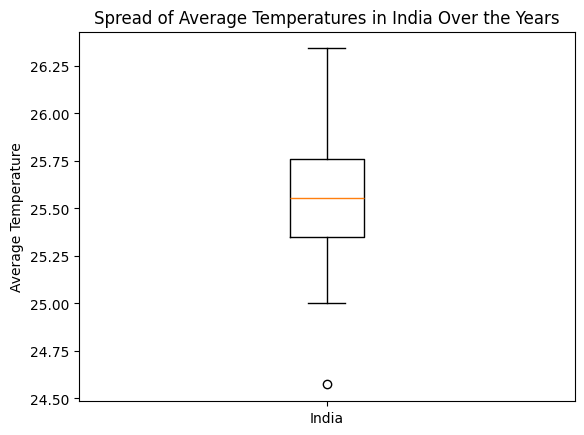

In [33]:
#Box plot(What is the spread of temparatures for a specific country over a given Period)
#X: Years or Countries, Y: Average Temperature

filtered_df = df[(df["Country"]=="India") & (df["Year"]<2000) & (df["Year"]>1900)]
indian_avg_temps_over_years = filtered_df.groupby("Year")["AverageTemperature"].mean()

print(indian_avg_temps_over_years.sort_values())

plt.boxplot(indian_avg_temps_over_years)
plt.xticks([1], ['India']) 
plt.ylabel('Average Temperature')
plt.title('Spread of Average Temperatures in India Over the Years')
plt.show()